# Exercise 4.10

## Compare with Departments

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

In [2]:
# Assigning the folder path to a variable
path = r"C:\Users\Toshiba\09-10-2023 Instacart Basket Analysis"

In [5]:
# Import dataset from previous task
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_cust_active_5_9.pkl'))

In [6]:
# Function to display all columns
pd.set_option('display.max_columns', None)

In [7]:
# Check output
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,max_order,loyalty_flag,mean_order,spending_flag,median_order,customer_flag,gender,state,age,date_joined,num_of_dependants,marital_status,income,regions,user_activity_flag,age_fam_profile
0,2539329,1,1,2,8,11.0,196,1,0,Soda,77,7,9.0,10,New customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,Young married adult
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,Young married adult
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,Young married adult
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,Young married adult
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,Young married adult


In [8]:
# Check dimensions
df.shape

(30964564, 29)

In [9]:
# Import the Departments wrangled dataset

df_dep1 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [10]:
# Check the dataframe with the department names

df_dep1.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [12]:
# Rename the first column as "department_id"

df_dep1.rename(columns={'Unnamed: 0':'department_id'}, inplace=True)

In [13]:
df_dep1.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [14]:
df_dep1.shape

(21, 2)

In [15]:
# Merge the large dataframe with df_dep

df_2 = df.merge(df_dep1, on = 'department_id', indicator = '_merge1')

In [17]:
df_2.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,max_order,loyalty_flag,mean_order,spending_flag,median_order,customer_flag,gender,state,age,date_joined,num_of_dependants,marital_status,income,regions,user_activity_flag,age_fam_profile,department,_merge1
0,2539329,1,1,2,8,11.0,196,1,0,Soda,77,7,9.0,10,New customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,Young married adult,beverages,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,Young married adult,beverages,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,Young married adult,beverages,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,Young married adult,beverages,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,Young married adult,beverages,both


In [18]:
# Crosstab customer profil with departments

crosstab_profile_dep = pd.crosstab(df_2['department'], df_2['age_fam_profile'], dropna = False)

In [19]:
# Calculate the row sums and sort the crosstab based on row sums; sort 'age_fam_profile' in the desired order

row_sums = crosstab_profile_dep.sum(axis=1)

In [20]:
# Define the desired order of the age-family profiles

desired_order = ['Young single adult', 'Young married adult', 'Middle-aged single adult', 
                 'Middle-aged married adult', 'Older single adult', 'Older married adult']

In [21]:
ct_sorted = crosstab_profile_dep.loc[row_sums.sort_values(ascending=True).index][desired_order]

In [22]:
ct_sorted

age_fam_profile,Young single adult,Young married adult,Middle-aged single adult,Middle-aged married adult,Older single adult,Older married adult
department,,,,,,
bulk,4423,7201,2534,7869,2676,8748
other,4942,7176,2745,7944,2842,8762
missing,9085,13414,5103,15379,5064,16723
pets,13461,18457,7454,21933,8025,23730
alcohol,20994,30662,12353,33022,11859,35737
international,34961,53885,20080,60617,21814,64634
babies,55705,85751,32653,97545,34351,104387
personal care,56941,87866,33152,102619,36313,107415
breakfast,90047,141892,52993,158167,56590,171161


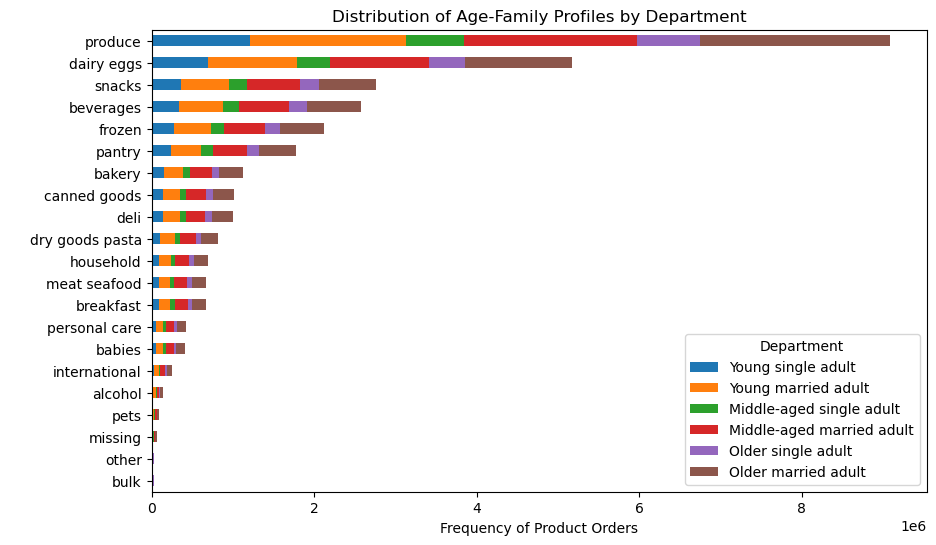

In [23]:
# Create a stacked bar chart

bar_profile_dep = ct_sorted.plot.barh(stacked=True, figsize=(10, 6))

plt.title('Distribution of Age-Family Profiles by Department')
plt.ylabel(' ')
plt.xlabel('Frequency of Product Orders')
plt.legend(title='Department', loc='lower right')

In [ ]:
# Create a stacked bar chart

#bar_profile_dep = ct_sorted.plot.barh(stacked=True, figsize=(10, 6))

#plt.title('Distribution of Age-Family Profiles by Department')
#plt.ylabel(' ')
#plt.xlabel('Frequency of Product Orders')
#plt.legend(title='Department', loc='lower right')

##### Married people purchase more than single people across all departments.

In [24]:
# Export chart

bar_profile_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'profile_department1.png'))

# 4. Export data

In [25]:
df_2.shape

(30964564, 31)

In [26]:
df_2.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_cust_active_dep.pkl'))